# Worksheet 2 — Answers (cv2 load → BGR to RGB via slicing)

Loaded: Worksheet2_RGB_Image.jpg | shape: (450, 600, 3) | dtype: uint8


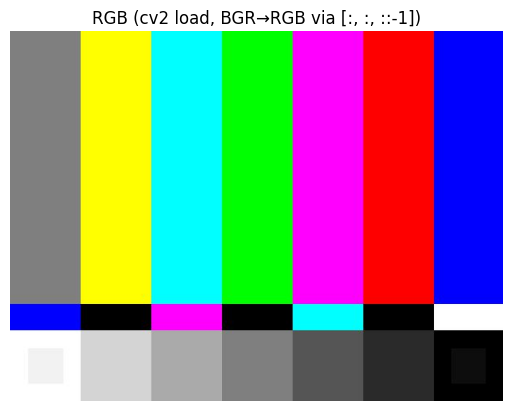

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

# Set the image path
IMG_PATH = Path('Worksheet2_RGB_Image.jpg')

# --- Load image with OpenCV (BGR) ---
bgr = cv2.imread(str(IMG_PATH), cv2.IMREAD_COLOR) # BGR format
if bgr is None:
    raise FileNotFoundError(f"Could not load {IMG_PATH}. Check the filename and extension.")

print('Loaded:', IMG_PATH.name, '| shape:', bgr.shape, '| dtype:', bgr.dtype)

# --- BGR → RGB using colon notation (reverse channel axis) ---
rgb = bgr[:, :, ::-1]  # (R, G, B)

plt.figure()
plt.imshow(rgb)
plt.axis('off')
plt.title('RGB (cv2 load, BGR→RGB via [:, :, ::-1])')
plt.show()


## 1) Colour splitting — show R, G, B channels as RGB images

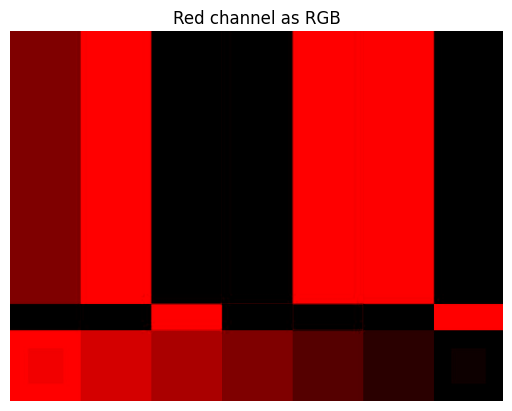

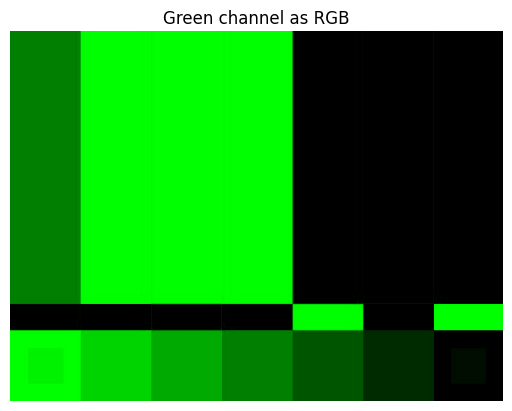

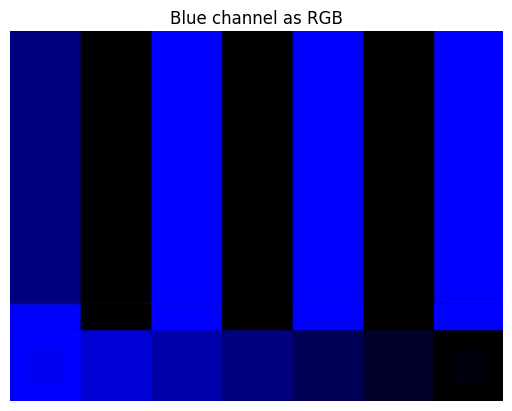

In [9]:
r_img = np.zeros_like(rgb); r_img[:, :, 0] = rgb[:, :, 0]
g_img = np.zeros_like(rgb); g_img[:, :, 1] = rgb[:, :, 1]
b_img = np.zeros_like(rgb); b_img[:, :, 2] = rgb[:, :, 2]

plt.figure(); plt.imshow(r_img); plt.axis('off'); plt.title('Red channel as RGB'); plt.show()
plt.figure(); plt.imshow(g_img); plt.axis('off'); plt.title('Green channel as RGB'); plt.show()
plt.figure(); plt.imshow(b_img); plt.axis('off'); plt.title('Blue channel as RGB'); plt.show()

## 2) Image Brightening — add +5 to every pixel (with clipping)

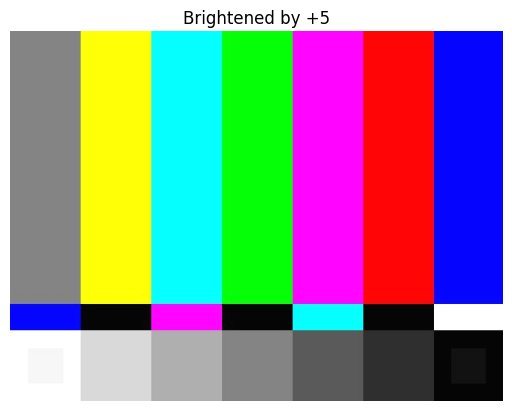

In [10]:
bright = np.clip(rgb.astype(np.int16) + 5, 0, 255).astype(np.uint8)
plt.figure(); plt.imshow(bright); plt.axis('off'); plt.title('Brightened by +5'); plt.show()

## 3) Image trimming — remove a 20 px border using colon notation

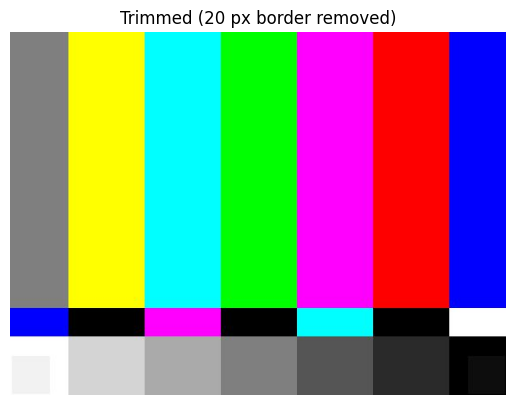

In [11]:
H, W = rgb.shape[:2]
if H <= 40 or W <= 40:
    raise ValueError('Image too small to trim 20 px from each side. Provide a larger image.')
trimmed = rgb[20:-20, 20:-20, :]

plt.figure(); plt.imshow(trimmed); plt.axis('off'); plt.title('Trimmed (20 px border removed)'); plt.show()

## 4) Image flipping — vertical & horizontal using colon notation

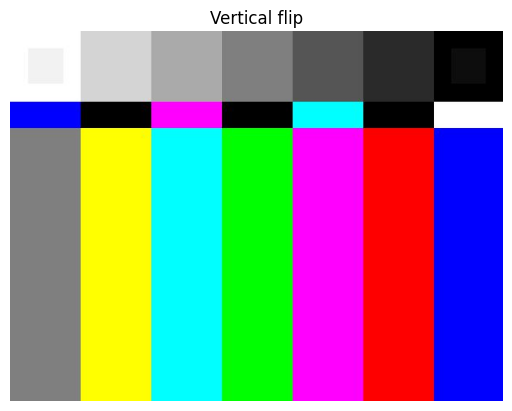

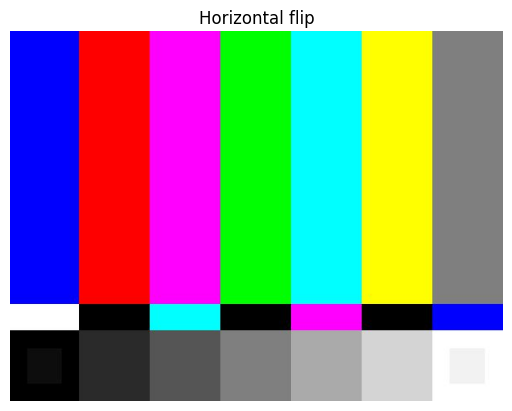

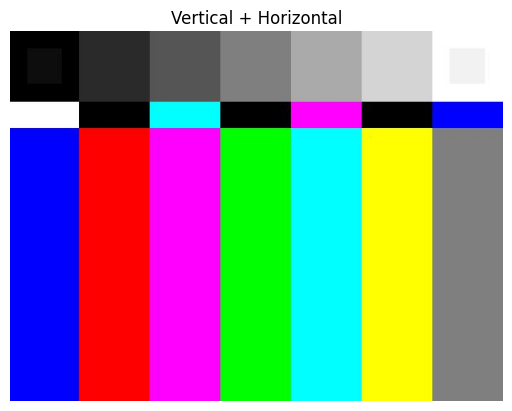

In [12]:
vflip = rgb[::-1, :, :]    # reverse rows (vertical flip)
hflip = rgb[:, ::-1, :]     # reverse cols (horizontal flip)
both  = rgb[::-1, ::-1, :]  # both axes (180° rotation)

plt.figure(); plt.imshow(vflip); plt.axis('off'); plt.title('Vertical flip'); plt.show()
plt.figure(); plt.imshow(hflip); plt.axis('off'); plt.title('Horizontal flip'); plt.show()
plt.figure(); plt.imshow(both); plt.axis('off'); plt.title('Vertical + Horizontal'); plt.show()